Just some EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

In [5]:
data_direc = 'elo-merchant-category-recommendation/'
train_core = pd.read_csv(data_direc+'train.csv')
merchants_data = pd.read_csv(data_direc+'merchants.csv')
histor_trans = pd.read_csv(data_direc+'historical_transactions.csv')
new_merc = pd.read_csv(data_direc+'new_merchant_transactions.csv')
test_core = pd.read_csv(data_direc+'test.csv')

In [5]:
# want to just explore the data briefly, see how it connects
train_core.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [6]:
merchants_data.head()
#print(np.unique(merchants_data['category_1'].values))
#print(np.unique(merchants_data['most_recent_sales_range'].values))
#print(np.unique(merchants_data['most_recent_purchases_range'].values))

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [6]:
histor_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [8]:
new_merc.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


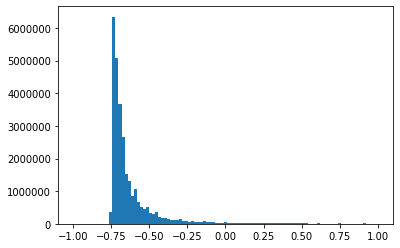

In [17]:
#print(len(np.unique(histor_trans['merchant_id'].values)))
#print(pd.isnull(histor_trans['merchant_id'].values))

plt.hist(histor_trans['purchase_amount'].values,range=(-1,1),bins=101)
plt.show()

In [18]:
# going to run a cell to see how many times some card id's show up in the historical
# new merchants dataframes
print('group id')
print(len(merchants_data['merchant_group_id'].values))
print(len(np.unique(merchants_data['merchant_group_id'].values)))
print('nan = ',np.count_nonzero(np.isnan(merchants_data['merchant_group_id'].values)))

print('\ncategory id')
print(len(merchants_data['merchant_category_id'].values))
print(len(np.unique(merchants_data['merchant_category_id'].values)))
print('nan = ',np.count_nonzero(np.isnan(merchants_data['merchant_category_id'].values)))

print('\nsubsector id')
print(len(merchants_data['subsector_id'].values))
print(len(np.unique(merchants_data['subsector_id'].values)))
print('nan = ',np.count_nonzero(np.isnan(merchants_data['subsector_id'].values)))

print('\nnumical_1 nan = ',np.count_nonzero(np.isnan(merchants_data['numerical_1'].values)))
print('numical_2 nan = ',np.count_nonzero(np.isnan(merchants_data['numerical_2'].values)))

print('\ncategory 1')
print(len(merchants_data['category_1'].values))
print(len(np.unique(merchants_data['category_1'].values)))
print('nan = ',np.count_nonzero(pd.isnull(merchants_data['category_1'].values)))

print('\nmost recent sales range')
print(len(merchants_data['most_recent_sales_range'].values))
print(len(np.unique(merchants_data['most_recent_sales_range'].values)))
print('nan = ',np.count_nonzero(pd.isnull(merchants_data['most_recent_sales_range'].values)))

print('\navg sales lag 3 nan = ',np.count_nonzero(np.isnan(merchants_data['avg_sales_lag3'].values)))
print('avg purchases lag 3 nan = ',np.count_nonzero(np.isnan(merchants_data['avg_purchases_lag3'].values)))
print('active months lag 3 nan = ',np.count_nonzero(np.isnan(merchants_data['active_months_lag3'].values)))

print('avg sales lag 6 nan = ',np.count_nonzero(np.isnan(merchants_data['avg_sales_lag6'].values)))
print('avg purchases lag 6 nan = ',np.count_nonzero(np.isnan(merchants_data['avg_purchases_lag6'].values)))
print('active months lag 6 nan = ',np.count_nonzero(np.isnan(merchants_data['active_months_lag6'].values)))

print('avg sales lag 12 nan = ',np.count_nonzero(np.isnan(merchants_data['avg_sales_lag12'].values)))
print('avg purchases lag 12 nan = ',np.count_nonzero(np.isnan(merchants_data['avg_purchases_lag12'].values)))
print('active months lag 12 nan = ',np.count_nonzero(np.isnan(merchants_data['active_months_lag12'].values)))

print('\ncategory 4')
print(len(merchants_data['category_4'].values))
print(len(np.unique(merchants_data['category_4'].values)))
print(np.unique(merchants_data['category_4'].values))
print('nan = ',np.count_nonzero(pd.isnull(merchants_data['category_4'].values)))

print('\ncategory 2')
print(len(merchants_data['category_2'].values))
print(len(np.unique(merchants_data['category_2'].values)))
print(np.unique(merchants_data['category_2'].values))
print('nan = ',np.count_nonzero(np.isnan(merchants_data['category_2'].values)))

print('\ncity id')
print(len(merchants_data['city_id'].values))
print(len(np.unique(merchants_data['city_id'].values)))
#print(np.unique(merchants_data['city_id'].values))
print('nan = ',np.count_nonzero(np.isnan(merchants_data['city_id'].values)))

print('\nstate id')
print(len(merchants_data['state_id'].values))
print(len(np.unique(merchants_data['state_id'].values)))
#print(np.unique(merchants_data['state_id'].values))
print('nan = ',np.count_nonzero(np.isnan(merchants_data['state_id'].values)))

group id
334696
109391
nan =  0

category id
334696
324
nan =  0

subsector id
334696
41
nan =  0

numical_1 nan =  0
numical_2 nan =  0

category 1
334696
2
nan =  0

most recent sales range
334696
5
nan =  0

avg sales lag 3 nan =  13
avg purchases lag 3 nan =  0
active months lag 3 nan =  0
avg sales lag 6 nan =  13
avg purchases lag 6 nan =  0
active months lag 6 nan =  0
avg sales lag 12 nan =  13
avg purchases lag 12 nan =  0
active months lag 12 nan =  0

category 4
334696
2
['N' 'Y']
nan =  0

category 2
334696
11892
[ 1.  2.  3. ... nan nan nan]
nan =  11887

city id
334696
271
nan =  0

state id
334696
25
nan =  0


In [19]:
#print(np.unique(histor_trans['category_3'][0:1000].values))
#print(histor_trans['category_3'][0:1000].values)

########## good check
#print(np.unique([x for x in histor_trans['category_3'].values if type(x)==str]))
#print(np.unique(histor_trans['category_1']))

#print(len(np.unique(train_core['card_id'].values)))
#print(len(np.unique(test_core['card_id'].values))) # test and train add up
#print(len(np.unique(histor_trans['card_id'].values)))
##########

print('checking historical transaction values below')

print('\nauthorized flag')
print(len(histor_trans['authorized_flag'].values))
print(len(np.unique(histor_trans['authorized_flag'].values)))
print(np.unique(histor_trans['authorized_flag'].values))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['authorized_flag'].values)))

print('\ncard id')
print(len(histor_trans['card_id'].values))
print(len(np.unique(histor_trans['card_id'].values)))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['card_id'].values)))

print('\ncity id')
print(len(histor_trans['city_id'].values))
print(len(np.unique(histor_trans['city_id'].values)))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['city_id'].values)))

print('\ncategory 1')
print(len(histor_trans['category_1'].values))
print(len(np.unique(histor_trans['category_1'].values)))
print(np.unique(histor_trans['category_1'].values))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['category_1'].values)))

print('\ninstallments')
print(len(histor_trans['installments'].values))
print(len(np.unique(histor_trans['installments'].values)))
print(np.unique(histor_trans['installments'].values))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['installments'].values)))

print('\ncategory 3')
print(len(histor_trans['category_3'].values))
print(len(np.unique([x for x in histor_trans['category_3'].values if type(x)!=float])))
print(np.unique([x for x in histor_trans['category_3'].values if type(x)!=float]))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['category_3'].values)))

print('\nmerchant category id')
print(len(histor_trans['merchant_category_id'].values))
print(len(np.unique(histor_trans['merchant_category_id'].values)))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['merchant_category_id'].values)))

print('\nmerchant id')
print(len(histor_trans['merchant_id'].values))
print(len(np.unique([x for x in histor_trans['merchant_id'].values if type(x)!=float])))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['merchant_id'].values)))

print('\nmonth lag')
print(len(histor_trans['month_lag'].values))
print(len(np.unique(histor_trans['month_lag'].values)))
print(np.unique(histor_trans['month_lag'].values))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['month_lag'].values)))

print('\ncategory 2')
print(len(histor_trans['category_2'].values))
print(len(np.unique(histor_trans['category_2'].values)))
print(np.unique(histor_trans['category_2'].values))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['category_2'].values)))

print('\nstate id')
print(len(histor_trans['state_id'].values))
print(len(np.unique(histor_trans['state_id'].values)))
print(np.unique(histor_trans['state_id'].values))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['state_id'].values)))

print('\nsubsector id')
print(len(histor_trans['subsector_id'].values))
print(len(np.unique(histor_trans['subsector_id'].values)))
print(np.unique(histor_trans['subsector_id'].values))
print('nan = ',np.count_nonzero(pd.isnull(histor_trans['subsector_id'].values)))

checking historical transaction values below

authorized flag
29112361
2
['N' 'Y']
nan =  0

card id
29112361
325540
nan =  0

city id
29112361
308
nan =  0

category 1
29112361
2
['N' 'Y']
nan =  0

installments
29112361
15
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12 999]
nan =  0

category 3
29112361
3
['A' 'B' 'C']
nan =  178159

merchant category id
29112361
327
nan =  0

merchant id
29112361
326311
nan =  138481

month lag
29112361
14
[-13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0]
nan =  0

category 2
29112361
2652869
[ 1.  2.  3. ... nan nan nan]
nan =  2652864

state id
29112361
25
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
nan =  0

subsector id
29112361
41
[-1  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
nan =  0


In [17]:
new_merc.head()



,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [18]:
print('\nauthorized flag')
print(len(new_merc['authorized_flag'].values))
print(len(np.unique(new_merc['authorized_flag'].values)))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['authorized_flag'].values)))

print('\ncard id')
print(len(new_merc['card_id'].values))
print(len(np.unique(new_merc['card_id'].values)))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['card_id'].values)))

print('\ncity id')
print(len(new_merc['city_id'].values))
print(len(np.unique(new_merc['city_id'].values)))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['city_id'].values)))

print('\ncategory 1')
print(len(new_merc['category_1'].values))
print(len(np.unique(new_merc['category_1'].values)))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['category_1'].values)))

print('\ninstallments')
print(len(new_merc['installments'].values))
print(len(np.unique(new_merc['installments'].values)))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['installments'].values)))

print('\ncategory 3')
print(len(new_merc['category_3'].values))
print(len(np.unique([x for x in new_merc['category_3'].values if type(x)!=float])))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['category_3'].values)))

print('\nmerchant category id')
print(len(new_merc['merchant_category_id'].values))
print(len(np.unique(new_merc['merchant_category_id'].values)))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['merchant_category_id'].values)))

print('\nmerchant id')
print(len(new_merc['merchant_id'].values))
print(len(np.unique([x for x in new_merc['merchant_id'].values if type(x)!=float])))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['merchant_id'].values)))

print('\nmonth lag')
print(len(new_merc['month_lag'].values))
print(len(np.unique(new_merc['month_lag'].values)))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['month_lag'].values)))

print('\ncategory 2')
print(len(new_merc['category_2'].values))
print(len(np.unique(new_merc['category_2'].values)))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['category_2'].values)))

print('\nstate id')
print(len(new_merc['state_id'].values))
print(len(np.unique(new_merc['state_id'].values)))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['state_id'].values)))

print('\nsubsector id')
print(len(new_merc['subsector_id'].values))
print(len(np.unique(new_merc['subsector_id'].values)))
print('nan = ',np.count_nonzero(pd.isnull(new_merc['subsector_id'].values)))



authorized flag
1963031
1
nan =  0

card id
1963031
290001
nan =  0

city id
1963031
308
nan =  0

category 1
1963031
2
nan =  0

installments
1963031
15
nan =  0

category 3
1963031
3
nan =  55922

merchant category id
1963031
314
nan =  0

merchant id
1963031
226129
nan =  26216

month lag
1963031
2
nan =  0

category 2
1963031
111750
nan =  111745

state id
1963031
25
nan =  0

subsector id
1963031
41
nan =  0


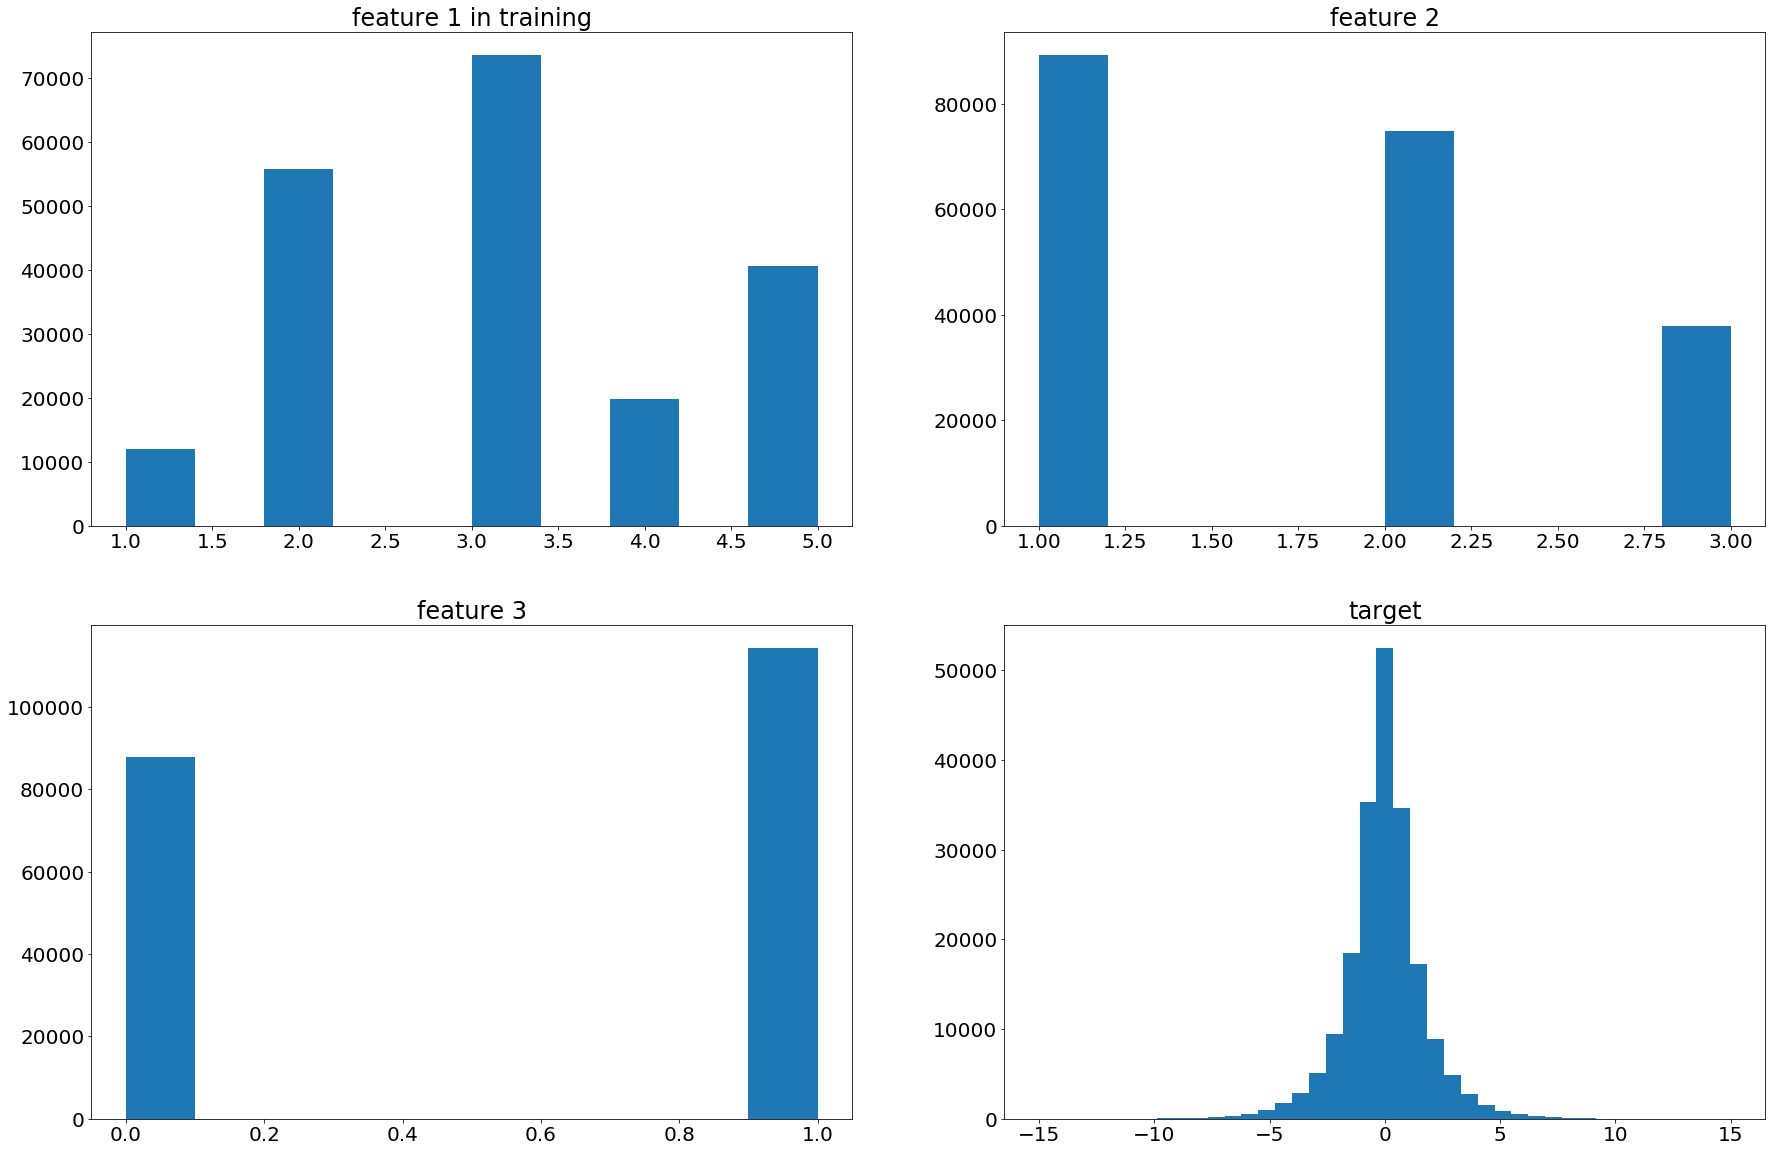

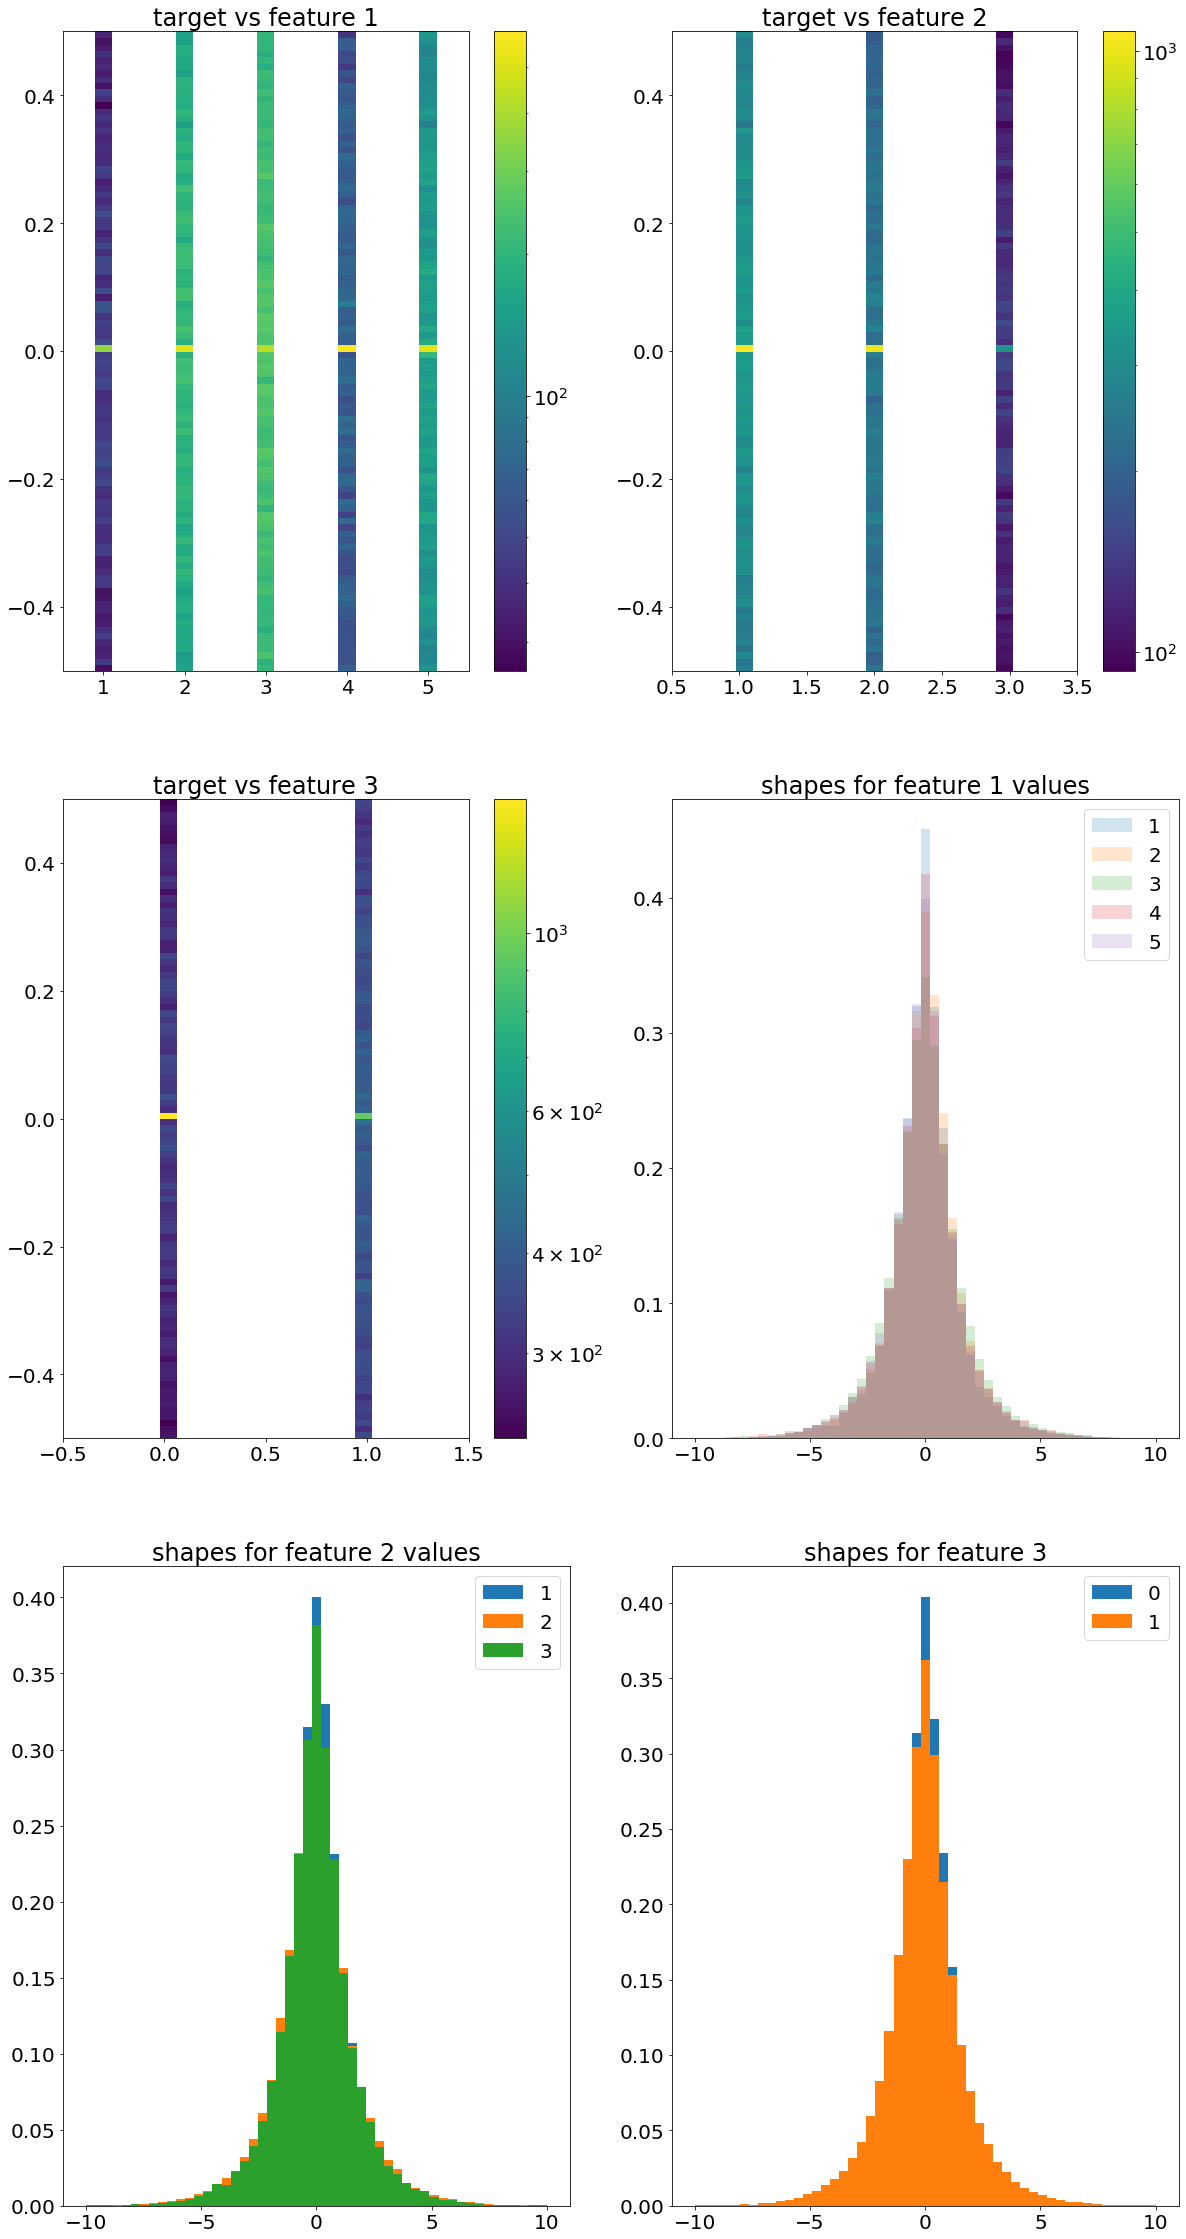

In [26]:
# start making some histograms to see what kinds of numbers I'm looking at

# to change the font size on the plots
matplotlib.rcParams.update({'font.size':20})

num_people, train_core_features = train_core.shape

#print('num customers = ', num_people)

# create some data for 1D histograms
matrix_vals = train_core[['feature_1','feature_2','feature_3','target']].values
tar1_f1 = [matrix_vals[i,3] for i in range(0,len(matrix_vals[:,0])-1) if matrix_vals[i,0]==1 ]
tar2_f1 = [matrix_vals[i,3] for i in range(0,len(matrix_vals[:,0])-1) if matrix_vals[i,0]==2 ]
tar3_f1 = [matrix_vals[i,3] for i in range(0,len(matrix_vals[:,0])-1) if matrix_vals[i,0]==3 ]
tar4_f1 = [matrix_vals[i,3] for i in range(0,len(matrix_vals[:,0])-1) if matrix_vals[i,0]==4 ]
tar5_f1 = [matrix_vals[i,3] for i in range(0,len(matrix_vals[:,0])-1) if matrix_vals[i,0]==5 ]

tar1_f2 = [matrix_vals[i,3] for i in range(0,len(matrix_vals[:,1])-1) if matrix_vals[i,1]==1 ]
tar2_f2 = [matrix_vals[i,3] for i in range(0,len(matrix_vals[:,1])-1) if matrix_vals[i,1]==2 ]
tar3_f2 = [matrix_vals[i,3] for i in range(0,len(matrix_vals[:,1])-1) if matrix_vals[i,1]==3 ]

tar1_f3 = [matrix_vals[i,3] for i in range(0,len(matrix_vals[:,2])-1) if matrix_vals[i,2]==0 ]
tar2_f3 = [matrix_vals[i,3] for i in range(0,len(matrix_vals[:,2])-1) if matrix_vals[i,2]==1 ]

#print(len(tar1_f1))

plt.subplots(nrows=2,ncols=2,figsize=(30,20))

plt.subplot(2,2,1)
plt.hist(train_core['feature_1'])
plt.title('feature 1 in training')
#plt.xticks

plt.subplot(2,2,2)
plt.hist(train_core['feature_2'])
plt.title('feature 2')

plt.subplot(2,2,3)
plt.hist(train_core['feature_3'])
plt.title('feature 3')

plt.subplot(2,2,4)
plt.hist(train_core['target'],range=(-15,15),bins=41,lw=3,ls='dashed')
plt.title('target')

plt.show()


plt.subplots(nrows=3,ncols=2,figsize=(20,40))

plt.subplot(3,2,1)
plt.hist2d(train_core['feature_1'],train_core['target'],norm=LogNorm(),
           bins=(25,100),range=([[0.5,5.5],[-0.5,0.5]]))
plt.colorbar()
plt.title('target vs feature 1')

plt.subplot(3,2,2)
plt.hist2d(train_core['feature_2'],train_core['target'],norm=LogNorm(),
           bins=(25,100),range=([[0.5,3.5],[-0.5,0.5]]))
plt.colorbar()
plt.title('target vs feature 2')

plt.subplot(3,2,3)
plt.hist2d(train_core['feature_3'],train_core['target'],norm=LogNorm(),
           bins=(25,100),range=([[-0.5,1.5],[-0.5,0.5]]))
plt.colorbar()
plt.title('target vs feature 3')

plt.subplot(3,2,4)
plt.hist(tar1_f1,range=(-10,10),bins=51,alpha=0.2,label='1',density=True)
plt.hist(tar2_f1,range=(-10,10),bins=51,alpha=0.2,label='2',density=True)
plt.hist(tar3_f1,range=(-10,10),bins=51,alpha=0.2,label='3',density=True)
plt.hist(tar4_f1,range=(-10,10),bins=51,alpha=0.2,label='4',density=True)
plt.hist(tar5_f1,range=(-10,10),bins=51,alpha=0.2,label='5',density=True)
plt.legend()
plt.title('shapes for feature 1 values')

plt.subplot(3,2,5)
plt.hist(tar1_f2,label='1',density=True,range=(-10,10),bins=51)
plt.hist(tar2_f2,label='2',density=True,range=(-10,10),bins=51)
plt.hist(tar3_f2,label='3',density=True,range=(-10,10),bins=51)
plt.legend()
plt.title('shapes for feature 2 values')

plt.subplot(3,2,6)
plt.hist(tar1_f3,label='0',density=True,range=(-10,10),bins=51)
plt.hist(tar2_f3,label='1',density=True,range=(-10,10),bins=51)
plt.legend()
plt.title('shapes for feature 3')

plt.show()

In [10]:
# examine the shapes of the other data
#history_rows, history_columns = histor_trans.shape()
#new_merc_rows, new_merc_cols = new_merc.shape()
#merchants_rows, merchants_columns = merchants_data.shape()

print(histor_trans.shape)
print(new_merc.shape)
print(merchants_data.shape)

(29112361, 14)
(1963031, 14)
(334696, 22)


In [13]:
# should print out max and min values, and count NaN's
for types in merchants_data:
    print(types)
    #print(merchants_data[types][0].dtype)
    #if type(merchants_data[types][0]) == str:
    #    print(types)
    #    print(np.unique(merchants_data[types].values))
    
print()
for types in histor_trans:
    print(types)
    #if type(histor_trans[types][0]) == str:
    #    print(types)
    #    print(np.unique(histor_trans[types].values))
    
print()
for types in new_merc:
    print(types)
    #if type(new_merc[types][0]) == str:
    #    print(types)
    #    print(np.unique(new_merc[types].values))
    
# just training data
#print(np.count_nonzero(np.isnan(train_core['feature_1'])))
#print(np.count_nonzero(np.isnan(train_core['feature_2'])))
#print(np.count_nonzero(np.isnan(train_core['feature_3'])))
print()
print(train_core['feature_3'].dtype)

print()
# avg sales lag 3 has nan data
print(np.count_nonzero(np.isnan(merchants_data['avg_purchases_lag6'].values)))

merchant_id
merchant_group_id
merchant_category_id
subsector_id
numerical_1
numerical_2
category_1
most_recent_sales_range
most_recent_purchases_range
avg_sales_lag3
avg_purchases_lag3
active_months_lag3
avg_sales_lag6
avg_purchases_lag6
active_months_lag6
avg_sales_lag12
avg_purchases_lag12
active_months_lag12
category_4
city_id
state_id
category_2

authorized_flag
card_id
city_id
category_1
installments
category_3
merchant_category_id
merchant_id
month_lag
purchase_amount
purchase_date
category_2
state_id
subsector_id

authorized_flag
card_id
city_id
category_1
installments
category_3
merchant_category_id
merchant_id
month_lag
purchase_amount
purchase_date
category_2
state_id
subsector_id

int64

0


C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


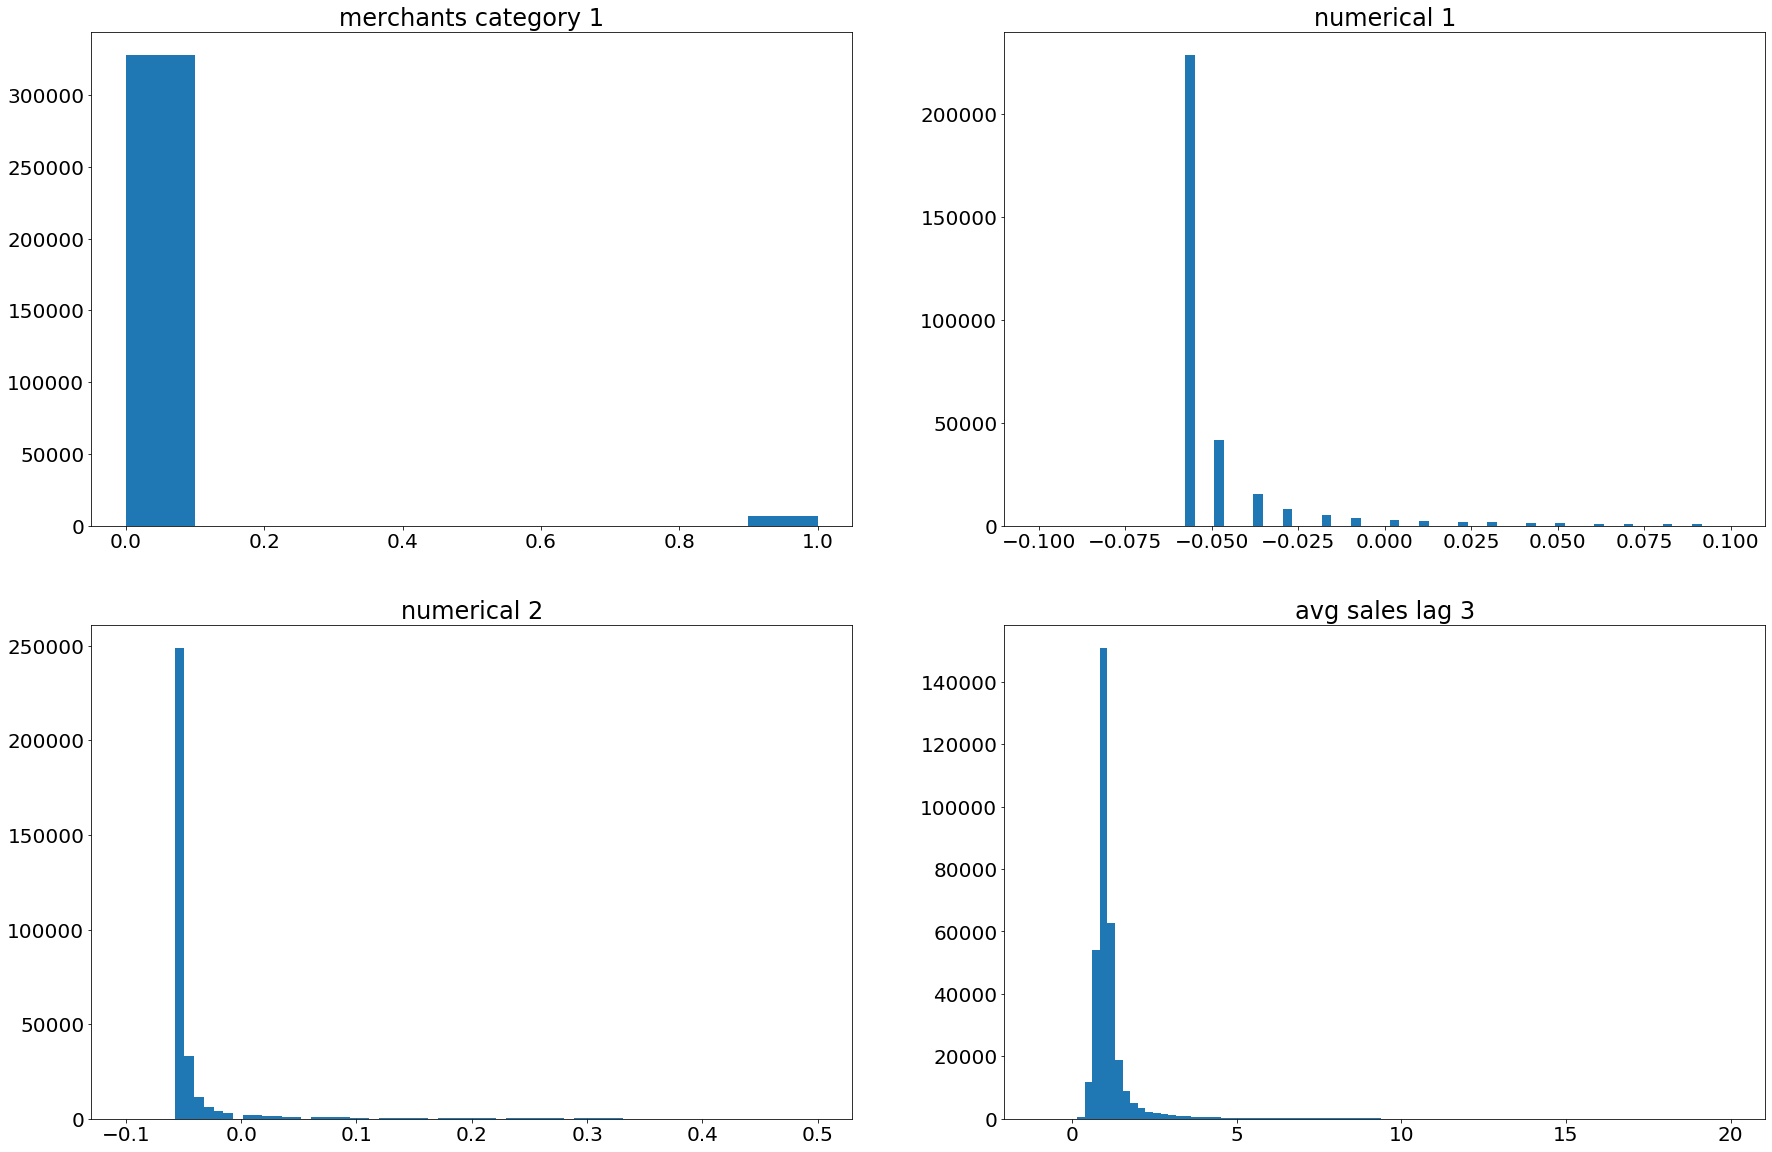

In [20]:
# look at some of the merchant data now

merchs_cat1 = merchants_data['category_1'].values
no_yes_dict = {'N':0,'Y':1}
merchs_cat1_ints = [no_yes_dict[vals] for vals in merchs_cat1]


plt.subplots(nrows=2,ncols=2,figsize=(30,20))

plt.subplot(2,2,1)
plt.hist(merchs_cat1_ints)
plt.title('merchants category 1')

plt.subplot(2,2,2)
plt.hist(merchants_data['numerical_1'],range=(-0.1,0.1),bins=71)
plt.title('numerical 1')

plt.subplot(2,2,3)
plt.hist(merchants_data['numerical_2'],range=(-0.1,0.5),bins=71)
plt.title('numerical 2')

plt.subplot(2,2,4)
plt.hist(merchants_data['avg_sales_lag3'],range=(-1,20),bins=91)
plt.title('avg sales lag 3')

plt.show()

[(-5, 5)]

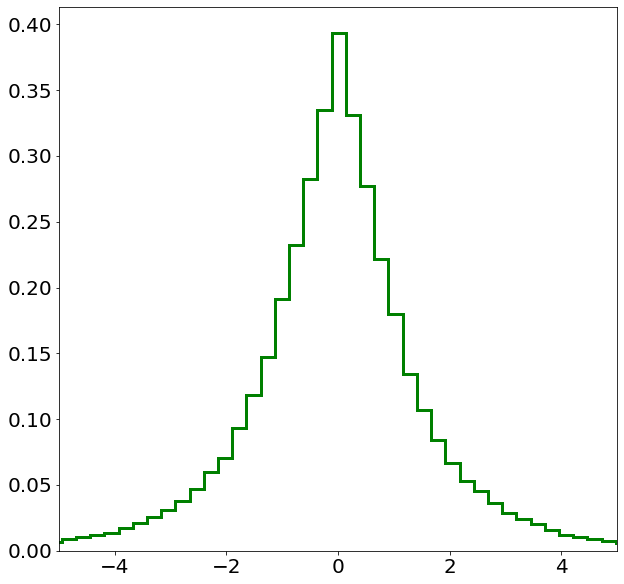

In [29]:
# should try some seaborne plots down here
# may give me better options for histograms

plt.subplots(nrows=1,ncols=1,figsize=(10,10))
ax = sns.distplot(train_core['target'].values,rug=False,kde=False,norm_hist=True,
             bins=201,hist_kws={'histtype':'step','linewidth':3,'alpha':1,'color':'g'})
ax.set(xlim=(-5,5))